#Data Insights


In [ ]:
import pandas as pd

In [ ]:
path = "./9.xlsx"
df = pd.read_excel(path)
print(df.head())

   Team Display Name           Athlete       Date             Opponet  PTS  \
0  Providence Friars      Alyssa Geary 2020-11-25  Quinnipiac Bobcats   17   
1  Providence Friars  Mary Baskerville 2020-11-25  Quinnipiac Bobcats   15   
2  Providence Friars    Olivia Orlando 2020-11-25  Quinnipiac Bobcats    5   
3  Providence Friars       Kyra Spiwak 2020-11-25  Quinnipiac Bobcats   14   
4  Providence Friars  Chanell Williams 2020-11-25  Quinnipiac Bobcats    8   

   MIN  FGM  FGA  PM  PA  ...  DREB  REB  AST  BLK  STL  TO  PF  Team Score  \
0   38    7   17   0   2  ...     3    5    4    3    1   4   5          65   
1   15    7   12   0   0  ...     7    9    2    1    1   2   4          65   
2   38    1    4   0   0  ...     6    9    0    0    2   1   2          65   
3   36    4   11   2   8  ...     3    3    3    0    0   0   1          65   
4   26    2    7   0   0  ...     2    3    3    0    0   2   3          65   

     Win  Game Score  
0  False         9.7  
1  False  

In [ ]:
unique_players = df['Athlete'].unique()
print(unique_players.size)
print(unique_players)

3002
['Alyssa Geary' 'Mary Baskerville' 'Olivia Orlando' ...
 'Julianna LaMendola' 'Lenee Beaumont' 'Henna Sandvik']


In [ ]:
unique_teams = df['Team Display Name'].unique()
print(unique_teams.size)

179


In [ ]:
total_games_played = df.groupby("Athlete")["Athlete"].count()
total_wins = df.groupby("Athlete")["Win"].sum()

win_percentage = (total_wins / total_games_played) * 100
print(win_percentage.sort_values(ascending=False).head(10))

Athlete
A'Jah Davis           100.0
Gabrielle Anderson    100.0
Megan Callahan        100.0
Hannah Jump           100.0
Hannah Hank           100.0
Hannah Griffin        100.0
Megan Harkey          100.0
Hanna Knoll           100.0
Hanna Hall            100.0
Halle Idowu           100.0
dtype: float64


In [ ]:
print(win_percentage.sort_values(ascending=True).head(10))

Athlete
Hannah Rousey           0.0
Lexi Green              0.0
Arianna Linoxilakis     0.0
Daniya Darby            0.0
Ariana Wilkes           0.0
Danyel Middleton        0.0
Leonor Paisana          0.0
Lenaijah Ferguson       0.0
Ariana Ramos Cardona    0.0
Samantha Will           0.0
dtype: float64


In [ ]:
total_games_played

,Athlete
Athlete,
A'Jah Davis,3
A'Moni Waiters,1
A'Riana Gray,1
A'riel Jackson,1
AJ Marotte,1
...,...
Zoee Hache,72
Zoesha Smith,1
Zoey Ward,29


In [ ]:
print(df[df["Athlete"] == "A'Riana Gray"])

               Team Display Name       Athlete       Date  \
5083  West Virginia Mountaineers  A'Riana Gray 2021-11-16   

                         Opponet  PTS  MIN  FGM  FGA  PM  PA  ...  DREB  REB  \
5083  St. Francis (PA) Red Flash    0    4    0    2   0   0  ...     0    1   

      AST  BLK  STL  TO  PF  Team Score   Win  Game Score  
5083    0    0    0   3   5          86  True        -5.7  

[1 rows x 23 columns]


In [ ]:
count = (total_games_played >= 5).sum()
print(count)

934


In [ ]:
columns_to_sum = ["PTS", "MIN", "FGM", "FGA", "PM", "PA", "FTM", "FTA",
                  "OREB", "DREB", "REB", "AST", "BLK", "STL", "TO", "PF",
                  "Team Score", "Win", "Game Score"]

athlete_summary = df.groupby("Athlete")[columns_to_sum].sum().reset_index()

athlete_summary["Matches Played"] = df.groupby("Athlete")["Athlete"].count().values

print(athlete_summary.head())

          Athlete  PTS  MIN  FGM  FGA  PM  PA  FTM  FTA  OREB  ...  REB  AST  \
0     A'Jah Davis   18   74    9   19   0   0    0    0     7  ...   22    4   
1  A'Moni Waiters    0    0    0    0   0   0    0    0     0  ...    0    0   
2    A'Riana Gray    0    4    0    2   0   0    0    0     1  ...    1    0   
3  A'riel Jackson    6   19    2    5   0   0    2    2     1  ...    1    3   
4      AJ Marotte    6   18    2    6   0   1    2    2     0  ...    0    0   

   BLK  STL  TO  PF  Team Score  Win  Game Score  Matches Played  
0    2    0   6   4         219    3        14.3               3  
1    0    0   0   0          55    0         0.0               1  
2    0    0   3   5          86    1        -5.7               1  
3    0    0   4   2          71    1         1.3               1  
4    0    2   0   0          72    1         4.6               1  

[5 rows x 21 columns]


In [ ]:
athlete_summary[athlete_summary['MIN']/athlete_summary['Matches Played'] < 10].count()

,0
Athlete,717
PTS,717
MIN,717
FGM,717
FGA,717
PM,717
PA,717
FTM,717
FTA,717
OREB,717


In [ ]:
athlete_summary.to_csv('Athlete_Summary.csv')

In [ ]:
team_summary = df.groupby("Team Display Name")[columns_to_sum].sum().reset_index()

team_summary["Matches Played"] = df.groupby("Team Display Name")["Team Display Name"].count().values

team_summary["Win Rate"] = (team_summary["Win"] / team_summary["Matches Played"]) * 100
print(win_percentage.sort_values(ascending=False).head(10))

print(team_summary.head())

Athlete
A'Jah Davis           100.0
Gabrielle Anderson    100.0
Megan Callahan        100.0
Hannah Jump           100.0
Hannah Hank           100.0
Hannah Griffin        100.0
Megan Harkey          100.0
Hanna Knoll           100.0
Hanna Hall            100.0
Halle Idowu           100.0
dtype: float64
            Team Display Name  PTS   MIN  FGM  FGA  PM   PA  FTM  FTA  OREB  \
0                  Akron Zips   53   200   19   57   1   13   14   20     8   
1  American University Eagles  163   600   56  162  17   59   34   50    28   
2    Arizona State Sun Devils   82   200   30   64  13   31    9   13    16   
3            Arizona Wildcats   78   200   31   66  11   24    5    9    18   
4          Army Black Knights  824  2600  285  775  88  290  166  247   164   

   ...  AST  BLK  STL   TO   PF  Team Score  Win  Game Score  Matches Played  \
0  ...    9    5   11   10    7         424    8        38.2               8   
1  ...   33    2   29   51   64        1838   22        83.4  

In [ ]:
team_summary.shape

(179, 22)

In [ ]:
team_summary.to_csv('Team_Summary.csv')

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = "/content/Athlete_Summary.csv"
df = pd.read_csv(file_path)

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_cols] = scaler_minmax.fit_transform(df_minmax[num_cols])

df_minmax.to_csv("Athlete_Summary_MinMax.csv")

In [ ]:
df_minmax.head()

,Unnamed: 0,Athlete,PTS,MIN,FGM,FGA,PM,PA,FTM,FTA,...,REB,AST,BLK,STL,TO,PF,Team Score,Win,Game Score,Matches Played
0,0.000000,A'Jah Davis,0.012950,0.017823,0.018672,0.014482,0.0,0.000000,0.000000,0.00000,...,0.030641,0.010336,0.014925,0.000000,0.015385,0.012698,0.026797,0.038961,0.037409,0.017094
1,0.000333,A'Moni Waiters,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005359,0.000000,0.024233,0.000000
2,0.000666,A'Riana Gray,0.000000,0.000963,0.000000,0.001524,0.0,0.000000,0.000000,0.00000,...,0.001393,0.000000,0.000000,0.000000,0.007692,0.015873,0.009412,0.012987,0.018981,0.000000
3,0.001000,A'riel Jackson,0.004317,0.004576,0.004149,0.003811,0.0,0.000000,0.006601,0.00432,...,0.001393,0.007752,0.000000,0.000000,0.010256,0.006349,0.007451,0.012987,0.025431,0.000000
4,0.001333,AJ Marotte,0.004317,0.004335,0.004149,0.004573,0.0,0.001427,0.006601,0.00432,...,0.000000,0.000000,0.000000,0.006579,0.000000,0.000000,0.007582,0.012987,0.028471,0.000000


In [ ]:
athlete_summary.sort_values(by="Game Score", ascending=False).head(10)

,Athlete,PTS,MIN,FGM,FGA,PM,PA,FTM,FTA,OREB,...,REB,AST,BLK,STL,TO,PF,Team Score,Win,Game Score,Matches Played
2330,Ny'Ceara Pryor,1222,2218,454,1013,27,136,287,413,137,...,462,297,14,237,162,178,4298,43,1059.0,67
10,Aaliyah Parker,1202,2179,453,1040,41,178,255,336,233,...,566,155,43,267,233,299,6117,50,938.8,88
248,Angel Parker,1390,2662,482,1312,125,428,301,437,93,...,386,387,21,304,390,243,6481,54,865.4,94
1397,Juana Camilion,1015,2514,386,903,93,314,150,190,77,...,408,266,50,180,230,213,4420,43,760.5,75
1260,Janelle Brown,956,2134,339,699,84,217,194,259,100,...,391,271,16,203,280,275,6807,77,747.5,105
1300,Jayme DeCesare,978,3477,318,908,154,490,188,240,100,...,471,355,9,108,201,180,6332,41,719.9,102
1896,Mackenzie DeWees,751,1918,279,623,21,68,172,259,166,...,433,161,8,171,120,96,4107,43,718.9,63
749,Dee Dee Davis,1332,2579,457,1255,115,387,303,463,98,...,462,226,6,161,297,169,5134,47,708.9,83
1343,Jessica Tomasetti,1024,3198,384,930,98,296,158,198,134,...,436,194,10,113,183,169,6963,58,700.2,114
2168,Mikala Morris,909,2244,385,881,11,47,128,173,204,...,703,137,134,81,235,178,5133,52,685.3,80


In [ ]:
athlete_summary.head(10)

,Athlete,PTS,MIN,FGM,FGA,PM,PA,FTM,FTA,OREB,...,REB,AST,BLK,STL,TO,PF,Team Score,Win,Game Score,Matches Played
0,A'Jah Davis,18,74,9,19,0,0,0,0,7,...,22,4,2,0,6,4,219,3,14.3,3
1,A'Moni Waiters,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,55,0,0.0,1
2,A'Riana Gray,0,4,0,2,0,0,0,0,1,...,1,0,0,0,3,5,86,1,-5.7,1
3,A'riel Jackson,6,19,2,5,0,0,2,2,1,...,1,3,0,0,4,2,71,1,1.3,1
4,AJ Marotte,6,18,2,6,0,1,2,2,0,...,0,0,0,2,0,0,72,1,4.6,1
5,Aalia Carlson,5,6,2,3,1,2,0,0,0,...,0,0,0,0,2,2,71,0,0.9,1
6,Aaliyah Frazier,0,3,0,1,0,1,0,0,0,...,0,0,0,1,1,0,58,1,-0.7,1
7,Aaliyah Gayles,0,12,0,4,0,3,0,2,1,...,1,2,0,1,4,1,93,1,-4.9,1
8,Aaliyah McQueen,4,5,2,3,0,1,0,0,3,...,3,2,0,0,0,1,77,1,5.8,1
9,Aaliyah Moore,405,1524,159,349,2,16,85,143,164,...,460,50,16,46,153,131,3285,17,291.5,61


# Attacking Score and Defending Score Calculation

In [ ]:
new_df = athlete_summary[['Athlete', 'Matches Played', 'Game Score']].copy()

new_df['Attacking Score'] = (athlete_summary['PTS'] + 0.4 * athlete_summary['FGM'] - 0.7 * athlete_summary['FGA'] - 0.4 * (athlete_summary['FTA'] - athlete_summary['FTM']) + 0.7 * athlete_summary['OREB'] + 0.7 * athlete_summary['AST'] - 0.4 * athlete_summary['PF'])
new_df['Defending Score'] = (0.3 * athlete_summary['DREB'] + 0.7 * athlete_summary['BLK'] + athlete_summary['STL'] - 0.4 * athlete_summary['PF'] -  athlete_summary['TO'])
print(new_df.head())

          Athlete  Matches Played  Game Score  Attacking Score  \
0     A'Jah Davis               3        14.3             14.4   
1  A'Moni Waiters               1         0.0              0.0   
2    A'Riana Gray               1        -5.7             -2.7   
3  A'riel Jackson               1         1.3              5.3   
4      AJ Marotte               1         4.6              2.6   

   Defending Score  
0             -1.7  
1              0.0  
2             -5.0  
3             -4.8  
4              2.0  


In [ ]:
new_df.head()

,Athlete,Matches Played,Game Score,Attacking Score,Defending Score
0,A'Jah Davis,3,14.3,14.4,-1.7
1,A'Moni Waiters,1,0.0,0.0,0.0
2,A'Riana Gray,1,-5.7,-2.7,-5.0
3,A'riel Jackson,1,1.3,5.3,-4.8
4,AJ Marotte,1,4.6,2.6,2.0


In [ ]:
athlete_summary.set_index("Athlete", inplace=True)
athlete_summary.loc["A'Jah Davis"]

,A'Jah Davis
PTS,18.0
MIN,74.0
FGM,9.0
FGA,19.0
PM,0.0
PA,0.0
FTM,0.0
FTA,0.0
OREB,7.0
DREB,15.0


In [ ]:
new_df.sort_values(by="Attacking Score", ascending=False).head(20)

,Athlete,Matches Played,Game Score,Attacking Score,Defending Score
2330,Ny'Ceara Pryor,67,1059.0,876.7,111.1
248,Angel Parker,94,865.4,848.8,-80.6
10,Aaliyah Parker,88,938.8,774.8,44.4
749,Dee Dee Davis,83,708.9,731.5,-90.2
1260,Janelle Brown,105,747.5,726.0,-88.5
1300,Jayme DeCesare,102,719.9,695.3,-47.4
1979,Makayla Firebaugh,114,641.8,685.8,-140.8
1397,Juana Camilion,75,760.5,676.2,-0.9
1343,Jessica Tomasetti,114,700.2,672.6,-40.0
636,Chloe Wilson,79,594.8,656.6,-157.0


In [ ]:
new_df.sort_values(by="Defending Score", ascending=False).head(20)

,Athlete,Matches Played,Game Score,Attacking Score,Defending Score
2330,Ny'Ceara Pryor,67,1059.0,876.7,111.1
1896,Mackenzie DeWees,63,718.9,582.2,98.3
693,Courtney Warley,47,528.6,408.8,78.2
282,Anna Ekerstedt,51,177.5,104.8,47.5
1885,Lytoya Baker,33,371.5,303.8,44.9
10,Aaliyah Parker,88,938.8,774.8,44.4
510,Caitlin Weimar,23,207.8,152.0,39.8
1189,Jada Dapaa,56,493.5,411.6,37.9
1246,Jamey Napoleon,17,108.1,55.3,37.6
2120,Meghan Andersen,33,407.7,350.1,31.2


# EDA Analysis



*   Model Building
*   Analysis
*   Handling Missing Values
*   Detecting Outliers



In [ ]:
df.to_csv('9.csv')

Basic Information:
Dataset shape: (3002, 23)

Data types:
Unnamed: 0.1        int64
Unnamed: 0          int64
Athlete            object
PTS                 int64
MIN                 int64
FGM                 int64
FGA                 int64
PM                  int64
PA                  int64
FTM                 int64
FTA                 int64
OREB                int64
DREB                int64
REB                 int64
AST                 int64
BLK                 int64
STL                 int64
TO                  int64
PF                  int64
Team Score          int64
Win                 int64
Game Score        float64
Matches Played      int64
dtype: object

Summary statistics:
       Unnamed: 0.1  Unnamed: 0          PTS          MIN          FGM  \
count    3002.00000  3002.00000  3002.000000  3002.000000  3002.000000   
mean     1500.50000  1500.50000    57.569287   189.412725    21.143238   
std       866.74708   866.74708   139.312727   421.220045    50.869633   
min         0

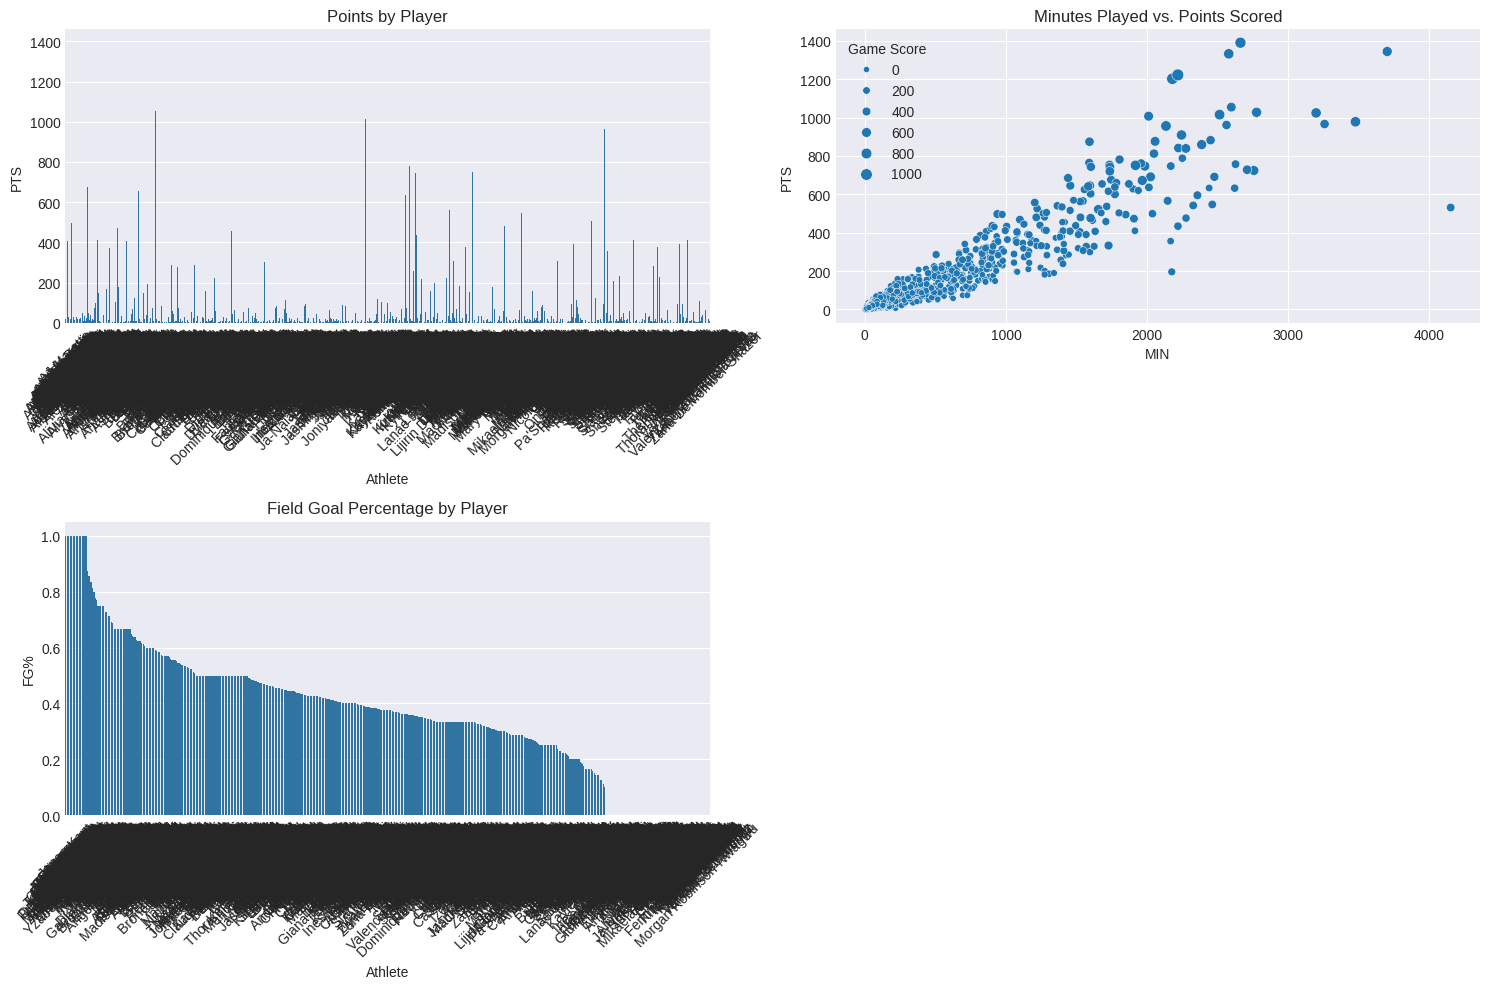

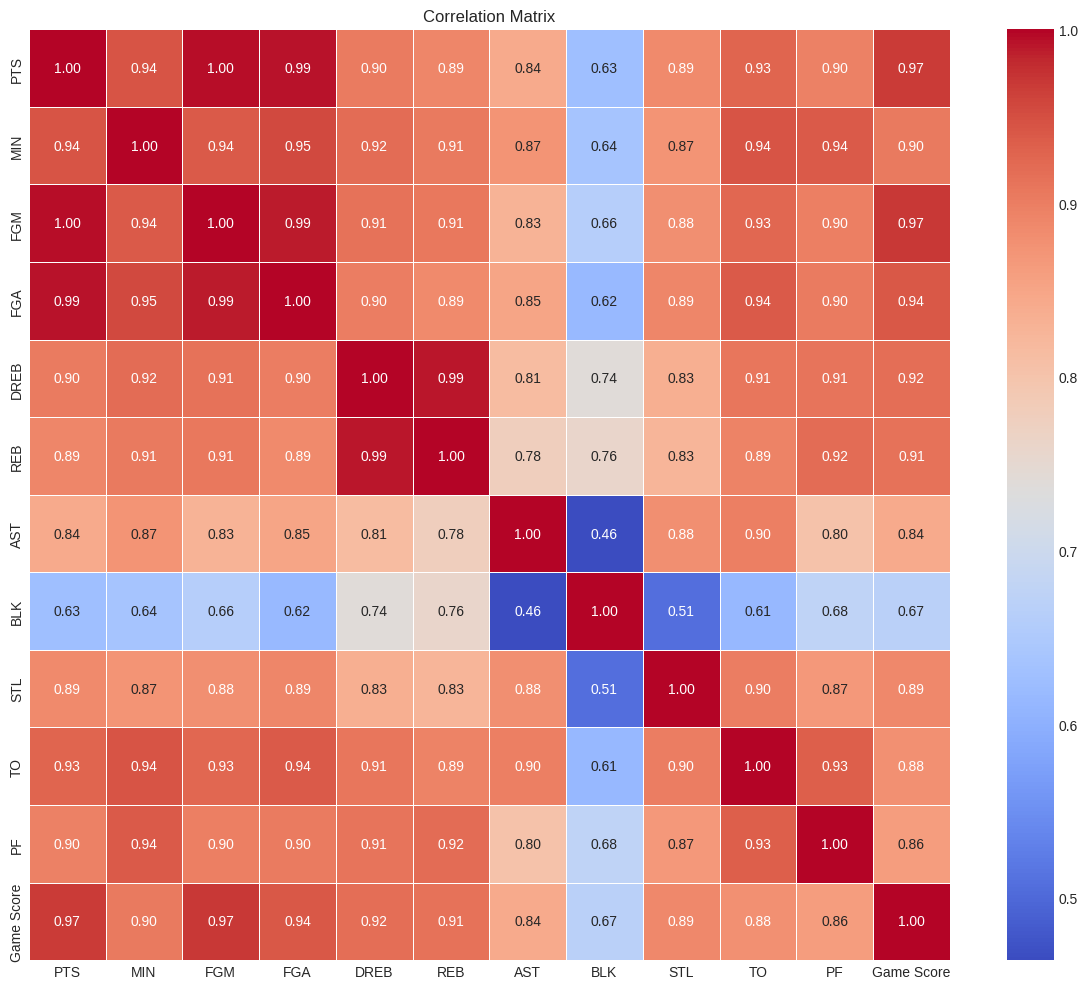

<ipython-input-29-f8ad67edbe5a>:72: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-29-f8ad67edbe5a>:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('player_efficiency.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


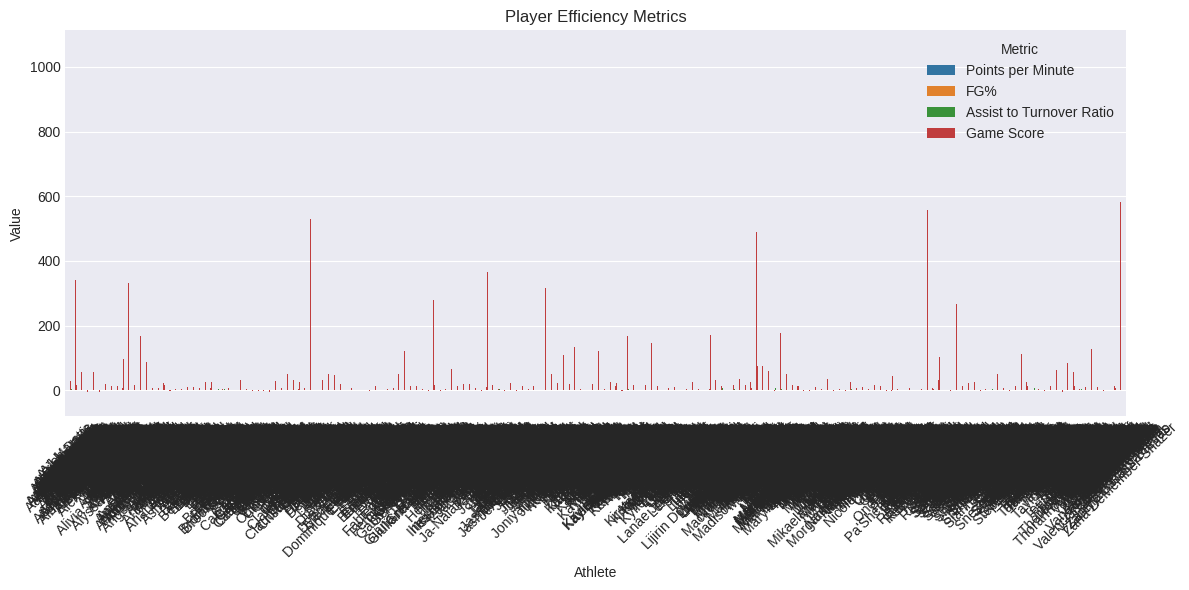


Player Summary Statistics:
                     PTS  REB  AST  BLK  STL   TO   MIN  Game Score       FG%
Athlete                                                                      
Ny'Ceara Pryor      1222  462  297   14  237  162  2218      1059.0  0.448174
Aaliyah Parker      1202  566  155   43  267  233  2179       938.8  0.435577
Angel Parker        1390  386  387   21  304  390  2662       865.4  0.367378
Juana Camilion      1015  408  266   50  180  230  2514       760.5  0.427464
Janelle Brown        956  391  271   16  203  280  2134       747.5  0.484979
...                  ...  ...  ...  ...  ...  ...   ...         ...       ...
Erin Harris           28   12   15    0   12   34   181       -14.9  0.210526
Destiny Jackson       27   24   13    0    7   25   273       -16.3  0.153846
Ramatoulaye Diallo     2    8    1    0    0   14    38       -16.8  0.000000
Emily O'Connell        4    5    2    0    1   14    79       -17.3  0.166667
Maddie Novak          29   30    2  

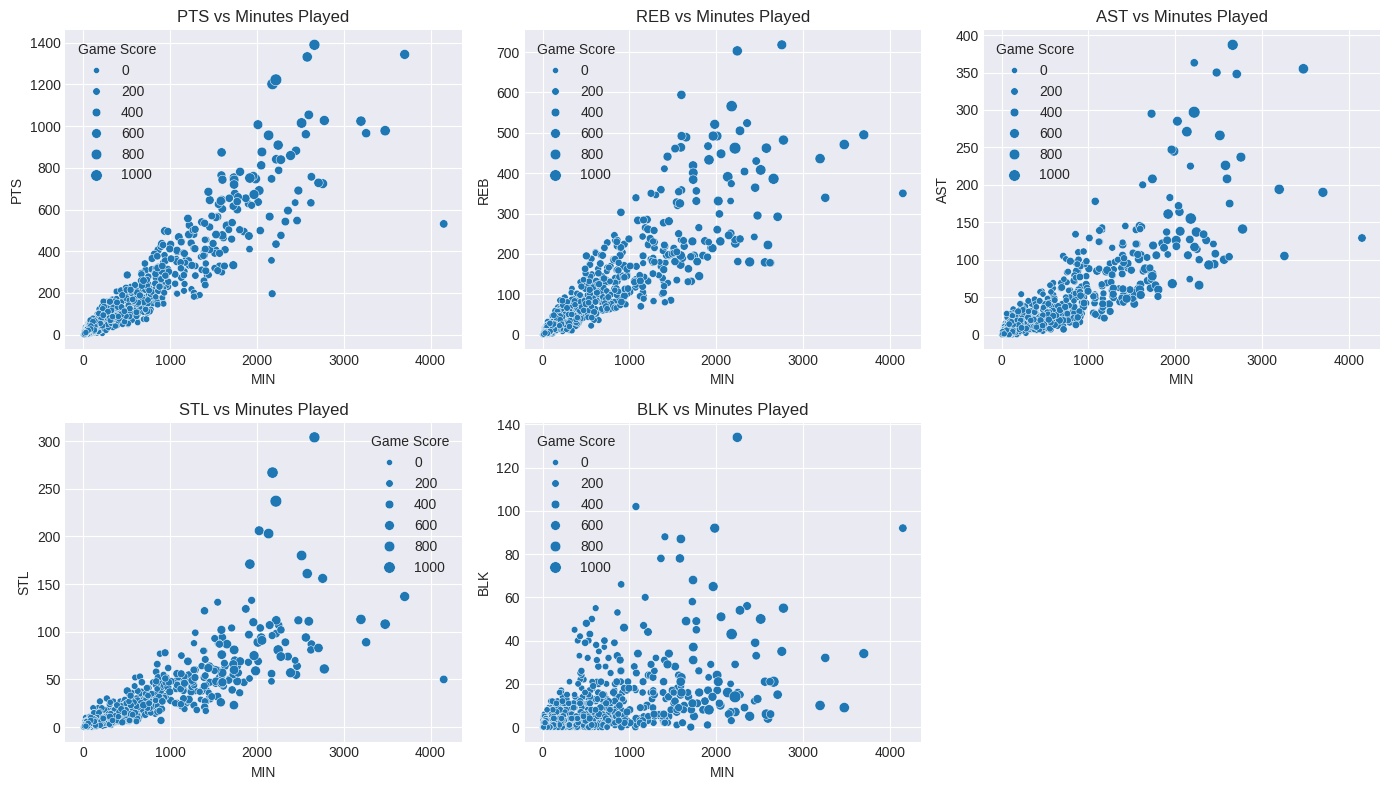

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('9.csv')

print("Basic Information:")
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

df['FG%'] = df['FGM'] / df['FGA']
df['3P%'] = df['PM'] / df['PA'].replace(0, np.nan)

df['Points per Minute'] = df['PTS'] / df['MIN']
df['Offensive Rebounds'] = df['REB'] - df['DREB']
df['Assist to Turnover Ratio'] = df['AST'] / df['TO'].replace(0, np.nan)


plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Athlete', y='PTS', data=df)
plt.title('Points by Player')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.scatterplot(x='MIN', y='PTS', size='Game Score', data=df)
plt.title('Minutes Played vs. Points Scored')

plt.subplot(2, 2, 3)
fg_data = df[['Athlete', 'FGM', 'FGA']].copy()
fg_data['FG%'] = df['FG%']
fg_data = fg_data.sort_values('FG%', ascending=False)
sns.barplot(x='Athlete', y='FG%', data=fg_data)
plt.title('Field Goal Percentage by Player')
plt.xticks(rotation=45)

best_player = df.loc[df['Game Score'].idxmax(), 'Athlete']
best_player_data = df[df['Athlete'] == best_player]

categories = ['PTS', 'REB', 'AST', 'BLK', 'STL', 'Game Score']
max_values = df[categories].max()
normalized_data = best_player_data[categories].iloc[0] / max_values

plt.tight_layout()
plt.savefig('basketball_eda.png')
plt.show()

numeric_cols = ['PTS', 'MIN', 'FGM', 'FGA', 'DREB', 'REB', 'AST', 'BLK', 'STL', 'TO', 'PF', 'Game Score']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

plt.figure(figsize=(12, 6))
efficiency = pd.melt(df, id_vars=['Athlete'], value_vars=['Points per Minute', 'FG%', 'Assist to Turnover Ratio', 'Game Score'],
                    var_name='Metric', value_name='Value')
sns.barplot(x='Athlete', y='Value', hue='Metric', data=efficiency)
plt.title('Player Efficiency Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('player_efficiency.png')
plt.show()

player_summary = df.groupby('Athlete').agg({
    'PTS': 'sum',
    'REB': 'sum',
    'AST': 'sum',
    'BLK': 'sum',
    'STL': 'sum',
    'TO': 'sum',
    'MIN': 'sum',
    'Game Score': 'mean',
    'FG%': 'mean'
}).sort_values('Game Score', ascending=False)

print("\nPlayer Summary Statistics:")
print(player_summary)

plt.figure(figsize=(14, 8))
metrics = ['PTS', 'REB', 'AST', 'STL', 'BLK']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x='MIN', y=metric, size='Game Score', data=df)
    plt.title(f'{metric} vs Minutes Played')

plt.tight_layout()
plt.savefig('performance_vs_minutes.png')
plt.show()

In [ ]:
import pandas as pd
df = pd.read_excel('9.xlsx')

print(df.head())

numeric_cols = ['PTS', 'MIN', 'FGM', 'FGA', 'PM', 'PA', 'FTM', 'FTA',
                'OREB', 'DREB', 'REB', 'AST', 'BLK', 'STL', 'TO', 'PF',
                'Team Score', 'Game Score']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])

df['Win'] = df['Win'].map({'TRUE': True, 'FALSE': False})

df['Date'] = pd.to_datetime(df['Date'])

total_games_played = df.groupby("Athlete")["Athlete"].transform("count")

def calculate_player_ratings(match_date, match_data):
    teams_in_match = match_data['Team Display Name'].unique()

    results = []

    for team in teams_in_match:
        team_df = match_data[match_data['Team Display Name'] == team]
        opponent_team = team_df['Opponet'].iloc[0]
        opponent_df = match_data[match_data['Team Display Name'] == opponent_team]

        team_stats = {
            'Team_MIN': team_df['MIN'].sum(),
            'Team_STL': team_df['STL'].sum(),
            'Team_BLK': team_df['BLK'].sum(),
            'Team_DREB': team_df['DREB'].sum(),
            'Team_OREB': team_df['OREB'].sum(),
            'Team_AST': team_df['AST'].sum(),
            'Team_PF': team_df['PF'].sum(),
            'Team_FGM': team_df['FGM'].sum(),
            'Team_FGA': team_df['FGA'].sum(),
            'Team_FTM': team_df['FTM'].sum(),
            'Team_FTA': team_df['FTA'].sum(),
            'Team_TO': team_df['TO'].sum(),
            'Team_PTS': team_df['PTS'].sum(),
        }

        opp_stats = {
            'Opponent_PTS': opponent_df['PTS'].sum(),
            'Opponent_FGM': opponent_df['FGM'].sum(),
            'Opponent_FGA': opponent_df['FGA'].sum(),
            'Opponent_FTM': opponent_df['FTM'].sum(),
            'Opponent_FTA': opponent_df['FTA'].sum(),
            'Opponent_OREB': opponent_df['OREB'].sum(),
            'Opponent_DREB': opponent_df['DREB'].sum(),
            'Opponent_MIN': opponent_df['MIN'].sum(),
            'Opponent_TO': opponent_df['TO'].sum(),
            'Opponent_STL': opponent_df['STL'].sum(),
            'Opponent_BLK': opponent_df['BLK'].sum(),
            'Opponent_PF': opponent_df['PF'].sum(),
        }

        team_poss = calculate_possessions(team_df)
        opp_poss = calculate_possessions(opponent_df)
        for _, player in team_df.iterrows():
            stops = calculate_stops(player, team_stats, opp_stats,total_games_played[player.name])
            offensive_score = calculate_offensive_score(player, team_stats, opp_stats, team_poss, total_games_played[player.name])
            drtg = calculate_defensive_rating(player, team_stats, opp_stats, team_poss, stops, total_games_played[player.name])
            ortg = calculate_offensive_rating(player, team_stats, opp_stats, team_poss, offensive_score,total_games_played[player.name])

            results.append({
                'Date': match_date,
                'Team': player['Team Display Name'],
                'Player': player['Athlete'],
                'Minutes': player['MIN'],
                'Points': player['PTS'],
                'Stops': stops,
                'Offensive Score': offensive_score,
                'Defensive Rating': drtg,
                'Offensive Rating': ortg
            })

    return results

   Team Display Name           Athlete       Date             Opponet  PTS  \
0  Providence Friars      Alyssa Geary 2020-11-25  Quinnipiac Bobcats   17   
1  Providence Friars  Mary Baskerville 2020-11-25  Quinnipiac Bobcats   15   
2  Providence Friars    Olivia Orlando 2020-11-25  Quinnipiac Bobcats    5   
3  Providence Friars       Kyra Spiwak 2020-11-25  Quinnipiac Bobcats   14   
4  Providence Friars  Chanell Williams 2020-11-25  Quinnipiac Bobcats    8   

   MIN  FGM  FGA  PM  PA  ...  DREB  REB  AST  BLK  STL  TO  PF  Team Score  \
0   38    7   17   0   2  ...     3    5    4    3    1   4   5          65   
1   15    7   12   0   0  ...     7    9    2    1    1   2   4          65   
2   38    1    4   0   0  ...     6    9    0    0    2   1   2          65   
3   36    4   11   2   8  ...     3    3    3    0    0   0   1          65   
4   26    2    7   0   0  ...     2    3    3    0    0   2   3          65   

     Win  Game Score  
0  False         9.7  
1  False  

In [ ]:
def calculate_possessions(team_df):
    possessions = team_df['FGA'].sum() - team_df['OREB'].sum() + team_df['TO'].sum() + (0.4 * team_df['FTA'].sum())
    return possessions

In [ ]:
def calculate_stops(player, team_stats, opp_stats, matches):
    team_min = team_stats['Team_MIN']
    team_stl = team_stats['Team_STL']
    team_blk = team_stats['Team_BLK']
    team_dreb = team_stats['Team_DREB']
    team_pf = team_stats['Team_PF']

    opp_fgm = opp_stats['Opponent_FGM']
    opp_fga = opp_stats['Opponent_FGA']
    opp_oreb = opp_stats['Opponent_OREB']
    opp_to = opp_stats['Opponent_TO']
    opp_fta = opp_stats['Opponent_FTA']
    opp_ftm = opp_stats['Opponent_FTM']

    stl = player['STL']
    blk = player['BLK']
    dreb = player['DREB']
    min_played = player['MIN']
    pf = player['PF']

    if opp_fga > 0:
        fg_part = opp_fgm / opp_fga
    else:
        fg_part = 0

    if (opp_oreb + team_dreb) > 0:
        dreb_part = 1 - (opp_oreb / (opp_oreb + team_dreb))
    else:
        dreb_part = 0

    d_part1 = (fg_part * dreb_part)
    d_part2 = (fg_part * dreb_part) + (1 - fg_part) * (opp_oreb / (opp_oreb + team_dreb + 1e-10))
    if d_part2 > 0:
        d_coefficient = d_part1 / d_part2
    else:
        d_coefficient = 0

    stops = stl + blk * d_coefficient * (1 - 1.07 * (opp_oreb / (opp_oreb + team_dreb + 1e-10)))
    stops += dreb * (1 - d_coefficient)

    if team_min > 0:
        stops += (((opp_fga - opp_fgm - team_blk) / team_min) *
                 d_coefficient *
                 (1 - 1.07 * (opp_oreb / (opp_oreb + team_dreb + 1e-10))) +
                 ((opp_to - team_stl) / team_min)) * min_played

    if team_pf > 0 and opp_fta > 0:
        stops += (pf / team_pf) * 0.4 * opp_fta * (1 - (opp_ftm / (opp_fta + 1e-10)))**2

    return stops/matches

In [ ]:
def calculate_defensive_rating(player, team_stats, opp_stats, team_poss, stops,matches):
    opp_pts = opp_stats['Opponent_PTS']
    opp_min = opp_stats['Opponent_MIN']
    opp_fgm = opp_stats['Opponent_FGM']
    opp_fta = opp_stats['Opponent_FTA']
    opp_ftm = opp_stats['Opponent_FTM']

    min_played = player['MIN']

    pts_per_poss = 0
    if team_poss > 0:
        pts_per_poss = 100 * (opp_pts / team_poss)

    scoring_poss = opp_fgm
    if opp_fta > 0:
        scoring_poss += (1 - (1 - (opp_ftm / (opp_fta + 1e-10)))**2) * opp_fta * 0.4

    floor_pct = 0
    if scoring_poss > 0:
        floor_pct = 100 * (opp_pts / scoring_poss)

    stop_pct = 0
    if team_poss > 0 and min_played > 0:
        stop_pct = (stops * opp_min) / (team_poss * min_played)

    defensive_rating = pts_per_poss + 0.2 * (floor_pct * (1 - stop_pct) - pts_per_poss)

    return defensive_rating/matches

In [ ]:
def calculate_offensive_score(player, team_stats, opp_stats, team_poss,matches):
    pts = player['PTS']
    fgm = player['FGM']
    fga = player['FGA']
    ftm = player['FTM']
    fta = player['FTA']
    oreb = player['OREB']
    ast = player['AST']
    to = player['TO']
    min_played = player['MIN']

    team_min = team_stats['Team_MIN']
    team_fgm = team_stats['Team_FGM']
    team_pts = team_stats['Team_PTS']
    team_oreb = team_stats['Team_OREB']
    team_ast = team_stats['Team_AST']

    opp_dreb = opp_stats['Opponent_DREB']

    scoring = pts
    if fga > 0:
        fg_efficiency = fgm / fga
    else:
        fg_efficiency = 0

    if fta > 0:
        ft_efficiency = ftm / fta
    else:
        ft_efficiency = 0

    if (team_oreb + opp_dreb) > 0:
        oreb_part = oreb / (team_oreb + opp_dreb)
    else:
        oreb_part = 0

    if team_pts > 0:
        assist_impact = ast * (team_pts / (2 * (team_fgm + 0.5 * team_stats['Team_FTM'])))
    else:
        assist_impact = 0

    turnover_impact = to

    offensive_score = scoring * fg_efficiency + 0.5 * scoring * ft_efficiency + oreb * oreb_part + assist_impact - turnover_impact

    poss_percent = min_played / team_min if team_min > 0 else 0

    offensive_score = offensive_score * poss_percent * 100

    return offensive_score/matches

In [ ]:
def calculate_offensive_rating(player, team_stats, opp_stats, team_poss, offensive_score,matches):
    pts = player['PTS']
    min_played = player['MIN']

    team_pts = team_stats['Team_PTS']
    team_min = team_stats['Team_MIN']

    pts_per_poss = 0
    if team_poss > 0:
        pts_per_poss = 100 * (team_pts / team_poss)

    player_contribution = 0
    if team_pts > 0 and team_min > 0:
        player_contribution = (pts / team_pts) * (min_played / team_min)

    ortg = pts_per_poss * (1 + (offensive_score / (100 * player_contribution + 1e-10)))

    return ortg/matches

In [ ]:
all_results = []

unique_dates = df['Date'].unique()

for match_date in unique_dates:
    match_data = df[df['Date'] == match_date]

    match_results = calculate_player_ratings(match_date, match_data)
    all_results.extend(match_results)

results_df = pd.DataFrame(all_results)

In [ ]:
results_df.head()

,Date,Team,Player,Minutes,Points,Stops,Offensive Score,Defensive Rating,Offensive Rating
0,2020-11-25,Providence Friars,Alyssa Geary,38,17,1.641263,51.707540,24.294193,216.140010
1,2020-11-25,Providence Friars,Mary Baskerville,15,15,0.183183,2.460183,4.047320,7.401182
2,2020-11-25,Providence Friars,Olivia Orlando,38,5,4.309289,22.437500,56.207235,774.692631
3,2020-11-25,Providence Friars,Kyra Spiwak,36,14,2.690429,136.675325,58.701127,1717.551850
4,2020-11-25,Providence Friars,Chanell Williams,26,8,0.965146,24.073622,30.563487,380.098716


In [ ]:
results_df[results_df['Player'] == 'Alyssa Geary']

,Date,Team,Player,Minutes,Points,Stops,Offensive Score,Defensive Rating,Offensive Rating
0,2020-11-25,Providence Friars,Alyssa Geary,38,17,1.641263,51.707540,24.294193,216.140010
212,2020-11-29,Providence Friars,Alyssa Geary,27,10,1.792554,33.552295,17.077679,345.811680
6261,2021-11-28,Providence Friars,Alyssa Geary,28,11,0.797152,31.452137,16.977567,293.337180
7390,2021-12-11,Providence Friars,Alyssa Geary,34,17,1.236896,51.555242,19.399594,261.077155
13725,2022-11-20,Indiana Hoosiers,Alyssa Geary,13,11,0.405172,16.950725,19.986514,570.268093


In [ ]:
columns_to_sum = ['Minutes', 'Stops','Offensive Score', 'Defensive Rating', 'Offensive Rating']
results_df_final = results_df.groupby("Player")[columns_to_sum].sum().reset_index()
results_df_final[results_df_final['Player'] == 'Alyssa Geary']

,Player,Minutes,Stops,Offensive Score,Defensive Rating,Offensive Rating
169,Alyssa Geary,140,5.873038,185.217939,97.735547,1686.634118


In [ ]:
len(results_df_final)

3002

In [ ]:
athlete_summary_filtered = results_df_final[athlete_summary['MIN']/athlete_summary['Matches Played'] >= 10]

print(athlete_summary_filtered.head())

           Player  Minutes     Stops  Offensive Score  Defensive Rating  \
0     A'Jah Davis       74  4.560942        39.309235         76.730749   
3  A'riel Jackson       19  2.796482        43.321242         81.268458   
4      AJ Marotte       18  3.722398        45.000000         85.833289   
7  Aaliyah Gayles       12  2.283163       -10.022222         66.991895   
9   Aaliyah Moore     1524  5.268683        61.647974        122.816424   

   Offensive Rating  
0      1.549411e+03  
3      5.389875e+03  
4      6.365217e+03  
7     -1.294537e+13  
9     -1.845970e+10  


In [ ]:
len(athlete_summary_filtered)

2285

In [ ]:
import seaborn as sns

<ipython-input-30-431dd8fcf8d3>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=athlete_summary_filtered, x='Offensive Rating', y='Defensive Rating', palette='coolwarm', s=50)


<Axes: xlabel='Offensive Rating', ylabel='Defensive Rating'>

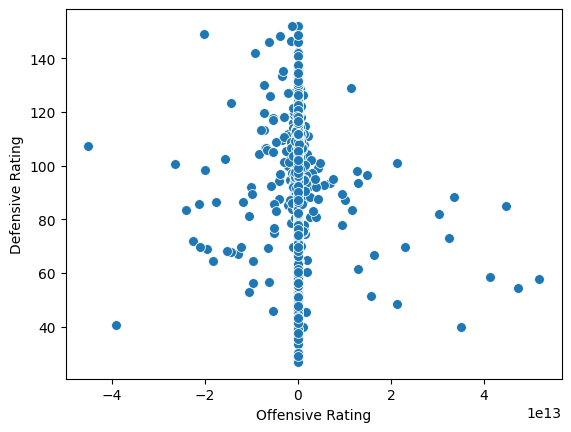

In [ ]:
sns.scatterplot(data=athlete_summary_filtered, x='Offensive Rating', y='Defensive Rating', palette='coolwarm', s=50)

In [ ]:
results_df_sorted = results_df.sort_values(by='Defensive Rating', ascending=True)

print(results_df_sorted.head())

           Date             Team              Player  Minutes     Stops  \
1521 2021-01-02  Fairfield Stags       Janelle Brown        1  1.094639   
1518 2021-01-02  Fairfield Stags  Andrea Hernangomez       23  7.844034   
1514 2021-01-02  Fairfield Stags    Callie Cavanaugh       16  3.527429   
1517 2021-01-02  Fairfield Stags           Sam Lewis       30  6.222615   
1513 2021-01-02  Fairfield Stags  Lou Lopez Senechal       38  6.757023   

      Defensive Rating  
1521      -1939.078025  
1518       -518.317195  
1514       -290.984965  
1517       -266.393336  
1513       -210.580324  


In [ ]:
results_df_sorted = results_df.sort_values(by='Defensive Rating', ascending=False)

print(results_df_sorted.head())

           Date                             Team             Player  Minutes  \
7071 2021-12-05  Central Connecticut Blue Devils  Samantha Chadwick        3   
7068 2021-12-05  Central Connecticut Blue Devils         Emma Bruen        8   
7067 2021-12-05  Central Connecticut Blue Devils     Carly Reynolds        7   
7063 2021-12-05  Central Connecticut Blue Devils      Arayana Young        7   
7070 2021-12-05  Central Connecticut Blue Devils      Belle Lanpher       20   

         Stops  Defensive Rating  
7071  0.185703        159.409772  
7068  0.495209        159.409772  
7067  0.433308        159.409772  
7063  0.433308        159.409772  
7070  1.263197        159.263794  


In [ ]:
results_df_final.to_csv('results_def.csv')

<ipython-input-33-1951c95c86be>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Offensive Rating', 'Defensive Rating']] = scaler.fit_transform(df[['Offensive Rating', 'Defensive Rating']])
<ipython-input-33-1951c95c86be>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df)
<ipython-input-33-1951c95c86be>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Accuracy: 1.00
[[  0   0   1]
 [  0 289   0]
 [  0   0 167]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       289
           2       0.99      1.00      1.00       167

    accuracy                           1.00       457
   macro avg       0.66      0.67      0.67       457
weighted avg       1.00      1.00      1.00       457



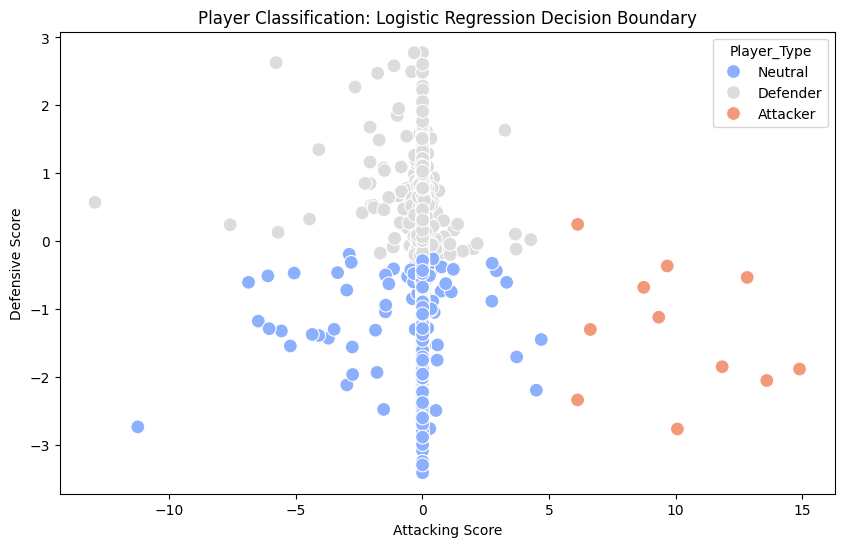

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

df = athlete_summary_filtered[['Offensive Rating', 'Defensive Rating']]

scaler = StandardScaler()
df[['Offensive Rating', 'Defensive Rating']] = scaler.fit_transform(df[['Offensive Rating', 'Defensive Rating']])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

centroids = kmeans.cluster_centers_
attacker_cluster = np.argmax(centroids[:, 0])
defender_cluster = np.argmax(centroids[:, 1])
neutral_cluster = list(set([0, 1, 2]) - set([attacker_cluster, defender_cluster]))[0]

cluster_labels = {attacker_cluster: 'Attacker', defender_cluster: 'Defender', neutral_cluster: 'Neutral'}
df['Player_Type'] = df['Cluster'].map(cluster_labels)

df['Player_Type_Num'] = df['Player_Type'].map({'Attacker': 0, 'Defender': 1, 'Neutral': 2})

X_train, X_test, y_train, y_test = train_test_split(df[['Offensive Rating', 'Defensive Rating']], df['Player_Type_Num'], test_size=0.2, random_state=42)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Offensive Rating', y='Defensive Rating', hue='Player_Type', palette='coolwarm', s=100)
plt.title('Player Classification: Logistic Regression Decision Boundary')
plt.xlabel('Attacking Score')
plt.ylabel('Defensive Score')
plt.show()
